<a href="https://colab.research.google.com/github/GusRaymundi/PDI/blob/main/LAB4_Filtragem_Espacial_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB4 — Filtragens no Domínio Espacial (continuação)

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Este notebook continua o lab anterior (Lab3), com foco nos conceitos de **filtragens no domínio espacial** em imagens digitais.

---

## Objetivos  
- Carregar e visualizar imagens em escala de cinza.  
- Exercitar a convolução de filtros sobre imagens.  
- Realizar filtragem para suavização de imagens.  
- Realizar filtragem para remoção de ruído sal & pimenta.  
- Realizar filtragem para realce de imagens.  
- Comparar os efeitos visuais das diferentes filtragens.  

---

## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [5]:
# Se necessário no Colab, descomente a linha abaixo:
!pip -q install numpy matplotlib scikit-image imageio

In [10]:
# %% setup - Importações e funções utilitárias
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

# 🖼️ Tarefa A — Reduzindo Ruído com Filtro de Média

Vamos utilizar **como ponto de partida** as funções de suavização implementadas no lab anterior (Lab3) para reduzir o ruído da imagem `lena_ruido.bmp`, que está disponível na pasta `data` do repositório no github.

**Lembre-se:** quanto maior o tamanho da máscara de filtragem, mais forte será o efeito de suavização.

A nova função deve:
- **Receber** o caminho de uma imagem BMP em escala de cinza com ruído.
- **Altere** os filtros gaussianos implementados no lab anterior para que se tornem filtros de média simples (isto é, todos os pontos dentro da máscara possuem o mesmo peso).
- **Suavizar** a imagem aplicando filtros de média.
- **Salvar** a imagem num arquivo BMP.
- **Retornar** o caminho da imagem salva.

In [11]:
def suaviza_media_3x3(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 3x3) -- vetorização processa todos os pixels de uma vez, sem laços!
    out = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        2*p[1:-1, 0:-2] + 1*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:  , 0:-2] + 1*p[2:  , 1:-1] + 1*p[2:  , 2:]
    ) / 9.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [12]:
def suaviza_media_5x5(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras
    p = np.pad(arr, ((2,2),(2,2)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 5x5) -- vetorização processa todos os pixels de uma vez, sem laços!
    out = np.zeros_like(arr, dtype=np.float32)
    for i in range(5):
        for j in range(5):
            out += p[i:i+arr.shape[0], j:j+arr.shape[1]]

    out /= 25.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_5x5.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [ ]:
# Repita para filtro 7x7

In [15]:
def suaviza_media_7x7(figura):

    path = Path(figura)   # "figura" deve já estar em escala de cinza
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' para evitar bordas escuras
    p = np.pad(arr, ((3,3),(3,3)), mode='reflect').astype(np.float32)

    # Convolução vetorizada (soma ponderada das vizinhanças 7x7) -- vetorização processa todos os pixels de uma vez, sem laços!
    out = np.zeros_like(arr, dtype=np.float32)
    for i in range(7):
        for j in range(7):
            out += p[i:i+arr.shape[0], j:j+arr.shape[1]]

    out /= 49.0

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_media_7x7.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

/tmp/ipython-input-619054216.py:20: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-3659963217.py:21: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


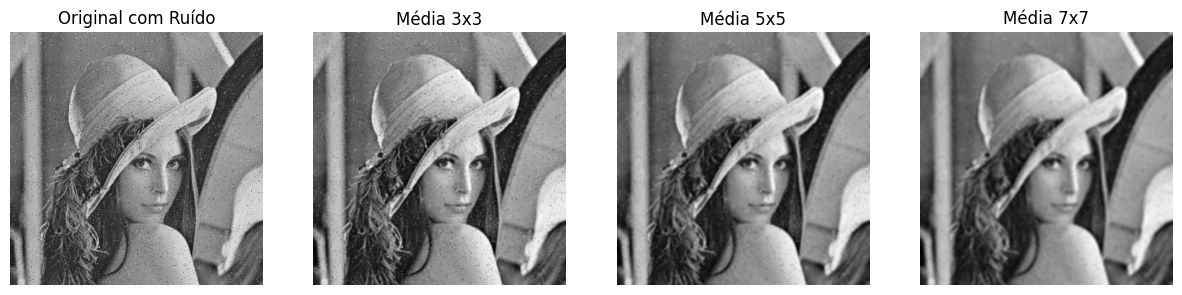

In [16]:
#Teste a aplicação para 3x3, 5x5 e 7x7

noisy_image_path = "/content/lena_ruido.bmp"

suavizada_3x3_path = suaviza_media_3x3(noisy_image_path)
suavizada_5x5_path = suaviza_media_5x5(noisy_image_path)
suavizada_7x7_path = suaviza_media_7x7(noisy_image_path)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(Image.open(noisy_image_path), cmap='gray')
axes[0].set_title('Original com Ruído')
axes[1].imshow(Image.open(suavizada_3x3_path), cmap='gray')
axes[1].set_title('Média 3x3')
axes[2].imshow(Image.open(suavizada_5x5_path), cmap='gray')
axes[2].set_title('Média 5x5')
axes[3].imshow(Image.open(suavizada_7x7_path), cmap='gray')
axes[3].set_title('Média 7x7')

for ax in axes:
    ax.axis('off')

plt.show()

---
# 🖼️ Tarefa B — Reduzindo Ruído com Filtro de Mediana

Você deve ter notado que após aplicar o filtro de média para reduzir o ruído, a imagem ficou **excessivamente suavizada**, perdendo nitidez. Além disso, o ruído ainda existe, apenas está borrado.

Para ruídos deste tipo da imagem de exemplo (chamado ruído "sal & pimenta"), a melhor solução é aplicar o **filtro de mediana**.

Nesta tarefa, aplique o filtro de mediana sobre a imagem ruidosa e verifique o **resultado**

In [ ]:
# Implemente o filtro de mediana 3x3

In [17]:
from scipy.ndimage import median_filter

def suaviza_mediana_3x3(figura):
    path = Path(figura)
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # Apply median filter
    out = median_filter(arr, size=3)

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_suave_mediana_3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [ ]:
# Teste o filtro de mediana 3x3

/tmp/ipython-input-2595399946.py:14: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")
/tmp/ipython-input-619054216.py:20: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


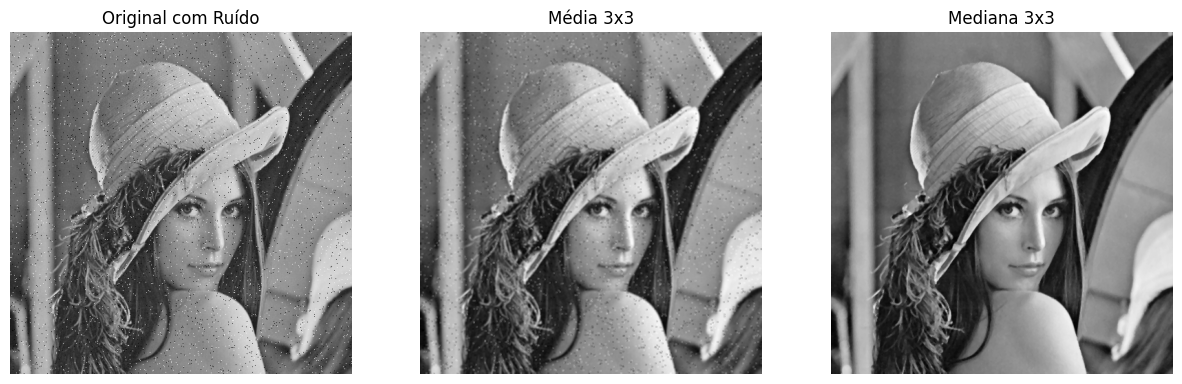

In [18]:
noisy_image_path = "/content/lena_ruido.bmp"
suavizada_mediana_3x3_path = suaviza_mediana_3x3(noisy_image_path)
suavizada_media_3x3_path = suaviza_media_3x3(noisy_image_path)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(Image.open(noisy_image_path), cmap='gray')
axes[0].set_title('Original com Ruído')
axes[1].imshow(Image.open(suavizada_media_3x3_path), cmap='gray')
axes[1].set_title('Média 3x3')
axes[2].imshow(Image.open(suavizada_mediana_3x3_path), cmap='gray')
axes[2].set_title('Mediana 3x3')


for ax in axes:
    ax.axis('off')

plt.show()

---
# 🖼️ Tarefa C — Realçando uma Imagem Muito Suavizada

Nesta tarefa, você deve criar um **filtro de realce** (ou aguçamento), que faz o efeito inverso da suavização: **destaca contornos e detalhes**.

Vamos criar um filtro de realce usando o **laplaciano**. O objetivo é recuperar a nitidez e evidenciar as transições de intensidade na imagem.

Use a mascara laplaciana clássica estudada na aula teórica:



```
    # Máscara Laplaciana 3x3 clássica (realce de bordas)
    lap = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        1*p[1:-1, 0:-2] +  -8*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:, 0:-2] + 1*p[2:, 1:-1] + 1*p[2:, 2:]
    )
```



In [ ]:
# Implemente o filtro de realce 3x3

In [19]:
def realce_laplaciano_3x3(figura):
    path = Path(figura)
    img = Image.open(path)
    arr = np.asarray(img, dtype=np.uint8)

    # padding 'reflect' evita bordas escuras
    p = np.pad(arr, ((1,1),(1,1)), mode='reflect').astype(np.float32)

    # Máscara Laplaciana 3x3 clássica (realce de bordas)
    lap = (
        1*p[0:-2, 0:-2] + 1*p[0:-2, 1:-1] + 1*p[0:-2, 2:] +
        1*p[1:-1, 0:-2] +  -8*p[1:-1, 1:-1] + 1*p[1:-1, 2:] +
        1*p[2:, 0:-2] + 1*p[2:, 1:-1] + 1*p[2:, 2:]
    )

    # Apply the Laplacian to the original image
    out = arr.astype(np.float32) - lap

    out = np.clip(out, 0, 255).astype(np.uint8)

    out_path = path.with_name(path.stem + "_realce_laplaciano_3x3.bmp")
    Image.fromarray(out, mode='L').save(out_path, format="BMP")

    return str(out_path)

In [ ]:
# Teste o filtro de realce 3x3

/tmp/ipython-input-491122380.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(out, mode='L').save(out_path, format="BMP")


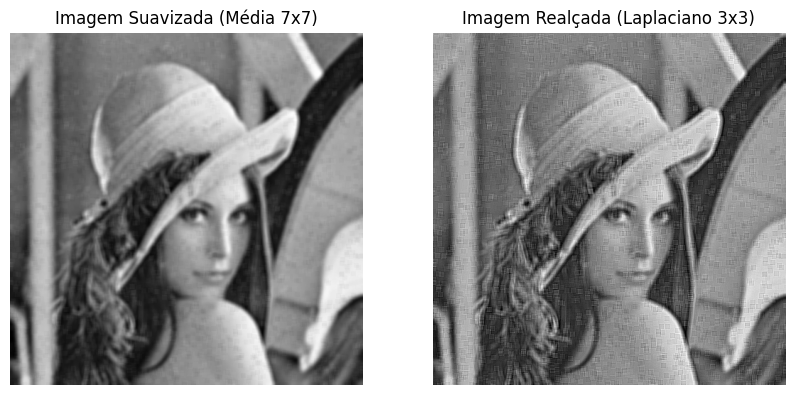

In [20]:
smoothed_image_path = "/content/lena_ruido_suave_media_7x7.bmp"
sharpened_image_path = realce_laplaciano_3x3(smoothed_image_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.open(smoothed_image_path), cmap='gray')
axes[0].set_title('Imagem Suavizada (Média 7x7)')
axes[1].imshow(Image.open(sharpened_image_path), cmap='gray')
axes[1].set_title('Imagem Realçada (Laplaciano 3x3)')

for ax in axes:
    ax.axis('off')

plt.show()